In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r"D:\AI WORKSHOP\TASK\KMEANS,HIERARCHIAL,DBSCAN\CC_GENERAL_preprocessed.csv")
features=['BALANCE','PURCHASES','CASH_ADVANCE','PAYMENTS','CREDIT_LIMIT',
          'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY',
          'TENURE','PRC_FULL_PAYMENT']
df_features=df[features]


In [25]:
for col in ['PURCHASES','CASH_ADVANCE','PAYMENTS','CREDIT_LIMIT']:
    Q1=df_features[col].quantile(0.25)
    Q3=df_features[col].quantile(0.75)
    IQR=Q3-Q1
    upper=Q3+1.5*IQR
    df_features[col]=np.where(df_features[col]>upper, upper, df_features[col])
scaler=RobustScaler()
df_scaled = scaler.fit_transform(df_features)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(pca_components, columns=['PC1','PC2'])


C:\Users\JHANANISHRI\AppData\Local\Temp\ipykernel_17976\1576684484.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[col]=np.where(df_features[col]>upper, upper, df_features[col])
C:\Users\JHANANISHRI\AppData\Local\Temp\ipykernel_17976\1576684484.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[col]=np.where(df_features[col]>upper, upper, df_features[col])
C:\Users\JHANANISHRI\AppData\Local\Temp\ipykernel_17976\1576684484.py:6: SettingWithCopyWarning: 
A value is trying to be se

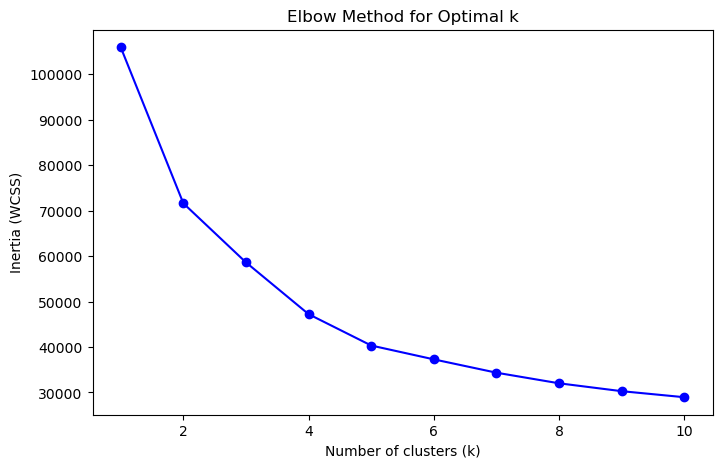

In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=50)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)   
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()


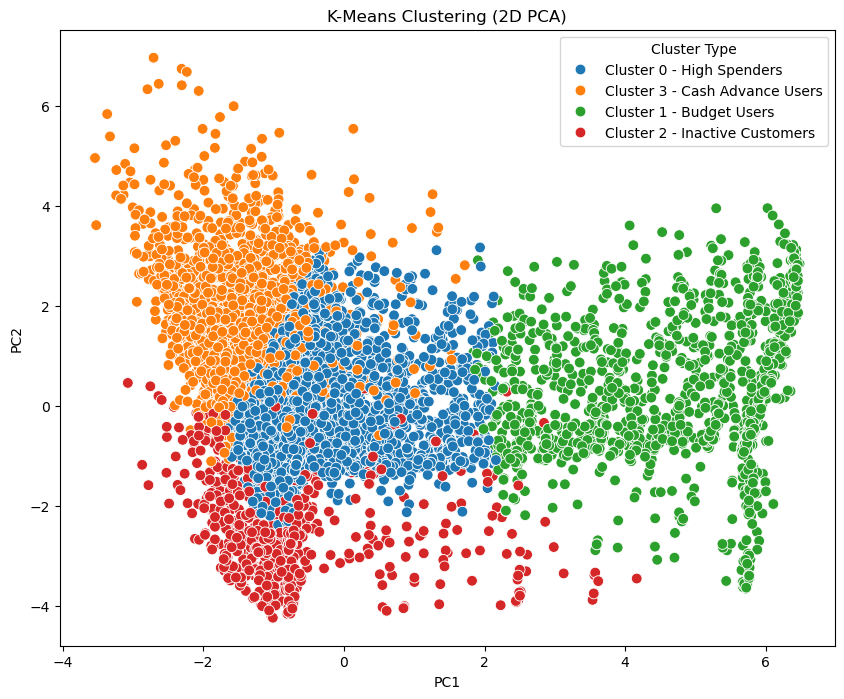

In [27]:
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=50)
kmeans_labels = kmeans.fit_predict(df_scaled)
pca_df['KMeans_Cluster'] = kmeans_labels

kmeans_mapping = {
    0: "Cluster 0 - High Spenders",
    1: "Cluster 1 - Budget Users",
    2: "Cluster 2 - Inactive Customers",
    3: "Cluster 3 - Cash Advance Users"
}
pca_df['KMeans_Cluster_Name'] = pca_df['KMeans_Cluster'].map(kmeans_mapping)

plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster_Name',
                data=pca_df, palette='tab10', s=60)
plt.title('K-Means Clustering (2D PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster Type')
plt.grid(False)
plt.show()


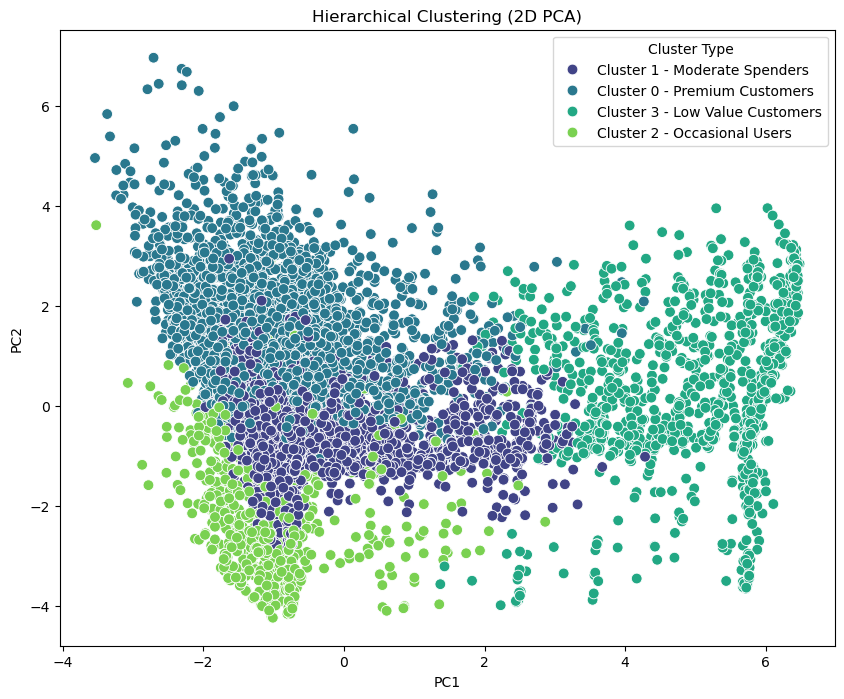

In [28]:
linkage_method = 'ward'
hierarchical = AgglomerativeClustering(n_clusters=best_k, linkage=linkage_method)
hier_labels = hierarchical.fit_predict(df_scaled)
pca_df['Hierarchical_Cluster'] = hier_labels

hier_mapping = {
    0: "Cluster 0 - Premium Customers",
    1: "Cluster 1 - Moderate Spenders",
    2: "Cluster 2 - Occasional Users",
    3: "Cluster 3 - Low Value Customers"
}
pca_df['Hierarchical_Cluster_Name'] = pca_df['Hierarchical_Cluster'].map(hier_mapping)

plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', hue='Hierarchical_Cluster_Name',
                data=pca_df, palette='viridis', s=60)
plt.title('Hierarchical Clustering (2D PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster Type')
plt.grid(False)
plt.show()


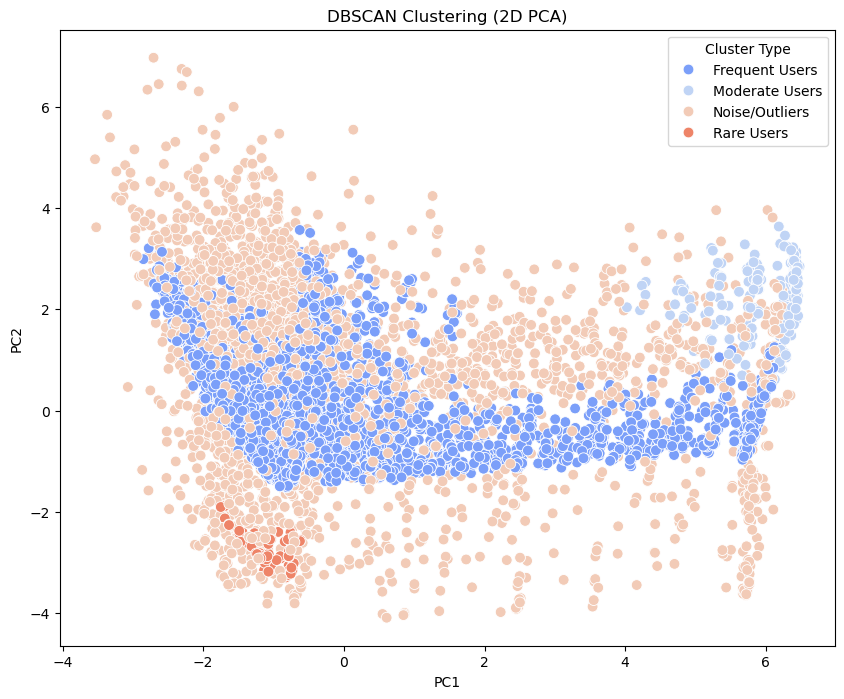

In [29]:
dbscan = DBSCAN(eps=1, min_samples=20)  
db_labels = dbscan.fit_predict(df_scaled)
pca_df['DBSCAN_Cluster'] = db_labels

dbscan_mapping = {
    -1: "Noise/Outliers",
    0: "Frequent Users",
    1: "Moderate Users",
    2: "Rare Users"
}
pca_df['DBSCAN_Cluster_Name'] = pca_df['DBSCAN_Cluster'].map(dbscan_mapping)
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster_Name',
                data=pca_df, palette='coolwarm', s=60)
plt.title('DBSCAN Clustering (2D PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster Type')
plt.grid(False)
plt.show()


In [30]:

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
best_k = 2
best_sil = -1
for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42, n_init=50)
    labels = km.fit_predict(df_scaled)
    sil = silhouette_score(df_scaled, labels)
    if sil > best_sil:
        best_sil = sil
        best_k = k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=50)
kmeans_labels = kmeans.fit_predict(df_scaled)
kmeans_sil = silhouette_score(df_scaled, kmeans_labels)
kmeans_dbi = davies_bouldin_score(df_scaled, kmeans_labels)
kmeans_ch = calinski_harabasz_score(df_scaled, kmeans_labels)
kmeans_inertia = kmeans.inertia_

In [31]:
linkages=['ward', 'complete', 'average', 'single']
best_link='ward'
best_sil_h=-1
for link in linkages:
    model=AgglomerativeClustering(n_clusters=best_k, linkage=link)
    labels=model.fit_predict(df_scaled)
    sil=silhouette_score(df_scaled, labels)
    if sil > best_sil_h:
        best_sil_h=sil
        best_link=link
hierarchical=AgglomerativeClustering(n_clusters=best_k, linkage=best_link)
hier_labels=hierarchical.fit_predict(df_scaled)
hier_sil=silhouette_score(df_scaled, hier_labels)
hier_dbi=davies_bouldin_score(df_scaled, hier_labels)
hier_ch=calinski_harabasz_score(df_scaled, hier_labels)


In [32]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

dbscan=DBSCAN(eps=0.5,min_samples=10)
db_labels=dbscan.fit_predict(df_scaled)
mask=db_labels!=-1

db_sil=silhouette_score(df_scaled[mask],db_labels[mask])
db_dbi=davies_bouldin_score(df_scaled[mask],db_labels[mask])
db_ch=calinski_harabasz_score(df_scaled[mask],db_labels[mask])


In [33]:
results = pd.DataFrame({
    'Model': ['K-Means', 'Hierarchical', 'DBSCAN'],
    'Silhouette': [kmeans_sil, hier_sil, db_sil],
    'Davies-Bouldin': [kmeans_dbi, hier_dbi, db_dbi],
    'Calinski-Harabasz': [kmeans_ch, hier_ch, db_ch],
    'Inertia': [kmeans_inertia, np.nan, np.nan]
})
results.head(3)


,Model,Silhouette,Davies-Bouldin,Calinski-Harabasz,Inertia
0,K-Means,0.436897,0.986939,4289.943651,71633.215304
1,Hierarchical,0.544746,0.329792,7.417854,NaN
2,DBSCAN,0.022058,0.743435,494.686433,NaN
